In [148]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [116]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

In [118]:
insurance.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Preprocessing data


In [119]:
rows, cols = insurance.shape
print(f"Rows: {rows}\nColumns: {cols}")

Rows: 1338
Columns: 7


In [121]:
mage = insurance['age'].max()
insurance['age'] = insurance['age']/mage
insurance['age'].astype('float32')

0       0.296875
1       0.281250
2       0.437500
3       0.515625
4       0.500000
          ...   
1333    0.781250
1334    0.281250
1335    0.281250
1336    0.328125
1337    0.953125
Name: age, Length: 1338, dtype: float32

In [122]:
insurance['bmi'] = insurance['bmi']/insurance['bmi'].max()
insurance['bmi'].astype("float32")

0       0.525127
1       0.635611
2       0.621118
3       0.427348
4       0.543572
          ...   
1333    0.582910
1334    0.600791
1335    0.693582
1336    0.485601
1337    0.547149
Name: bmi, Length: 1338, dtype: float32

In [123]:
insurance['children'] = insurance['children']/insurance['children'].max()
insurance['children'].astype("float32")

0       0.0
1       0.2
2       0.6
3       0.0
4       0.0
       ... 
1333    0.6
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: children, Length: 1338, dtype: float32

In [124]:
insurance['smoker'] = insurance['smoker'].replace({'yes': 1, 'no': 0})
insurance['smoker'].astype("float32")

0       1.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1333    0.0
1334    0.0
1335    0.0
1336    0.0
1337    1.0
Name: smoker, Length: 1338, dtype: float32

In [125]:
insurance['sex'] = insurance['sex'].replace({'male': 1, 'female': 0})
insurance['sex'].astype('float32')

0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
1333    1.0
1334    0.0
1335    0.0
1336    0.0
1337    0.0
Name: sex, Length: 1338, dtype: float32

In [126]:
count = insurance['region'].value_counts()
print(count)

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [127]:
insurance['region'] = insurance['region'].replace({'southeast': 0.2, 'southwest': 0.4, 'northwest': 0.6, 'northeast': 0.8})
insurance['region'].astype("float32")

0       0.4
1       0.2
2       0.2
3       0.6
4       0.6
       ... 
1333    0.6
1334    0.8
1335    0.2
1336    0.4
1337    0.6
Name: region, Length: 1338, dtype: float32

In [139]:
insurance['charges'] = insurance['charges']/insurance['charges'].max()
insurance['charges'].astype("float32")

0       0.264777
1       0.027059
2       0.069773
3       0.344744
4       0.060637
          ...   
1333    0.166230
1334    0.034593
1335    0.025558
1336    0.031487
1337    0.456973
Name: charges, Length: 1338, dtype: float32

In [141]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,0.296875,0,0.525127,0.0,1,0.4,0.264777
1,0.281250,1,0.635611,0.2,0,0.2,0.027059
2,0.437500,1,0.621118,0.6,0,0.2,0.069773
3,0.515625,1,0.427348,0.0,0,0.6,0.344744
4,0.500000,1,0.543572,0.0,0,0.6,0.060637


In [142]:
x = insurance.drop("charges", axis=1)
y = insurance["charges"]

In [143]:
# Training and Testin data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=7)

In [144]:
ytrain.astype('float32')
ytest.astype('float32')

13      0.173916
1052    0.145648
172     0.026577
1085    0.298308
683     0.154672
          ...   
123     0.620295
1214    0.062036
97      0.160361
220     0.078602
41      0.077618
Name: charges, Length: 268, dtype: float32

In [145]:
xtrain.head()

,age,sex,bmi,children,smoker,region
1317,0.281250,1,1.000000,0.0,0,0.2
794,0.609375,0,0.600791,0.4,0,0.6
680,0.328125,0,0.327499,0.2,0,0.4
795,0.421875,1,0.536420,0.0,1,0.6
887,0.562500,0,0.565029,0.0,0,0.6


### model building

In [146]:
tf.random.set_seed(5)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(xtrain.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(
    loss = tf.keras.losses.Huber(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics = ['mae']
)

es = tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
#lrs = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4*(10**(epoch/20)))

history = model.fit(xtrain, ytrain, epochs=150, verbose=0,validation_split=0.2, callbacks=[es])
evaluation = model.evaluate(xtest, ytest)
print(evaluation)

9/9 [==============================] - 0s 4ms/step - loss: 0.0032 - mae: 0.0512
[0.0032386539969593287, 0.05124158039689064]


### plot the metrics

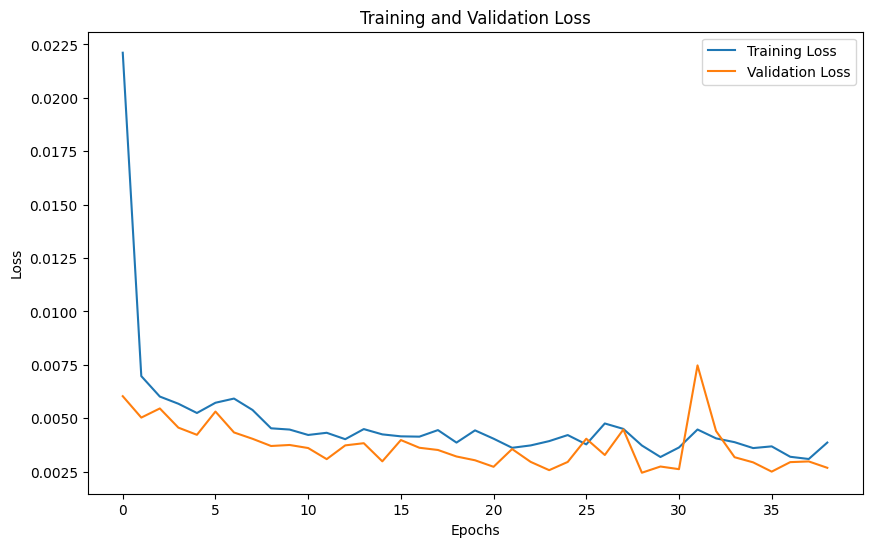

In [147]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()